In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


# For reproducibility
np.random.seed(1000)

nb_samples = 500

In [2]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,
                               n_clusters_per_class=1)

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

#Create and train logistic regressor
lr = LogisticRegression()
lr.fit(X_train, Y_train)


LogisticRegression()

(0.0, 1.0)

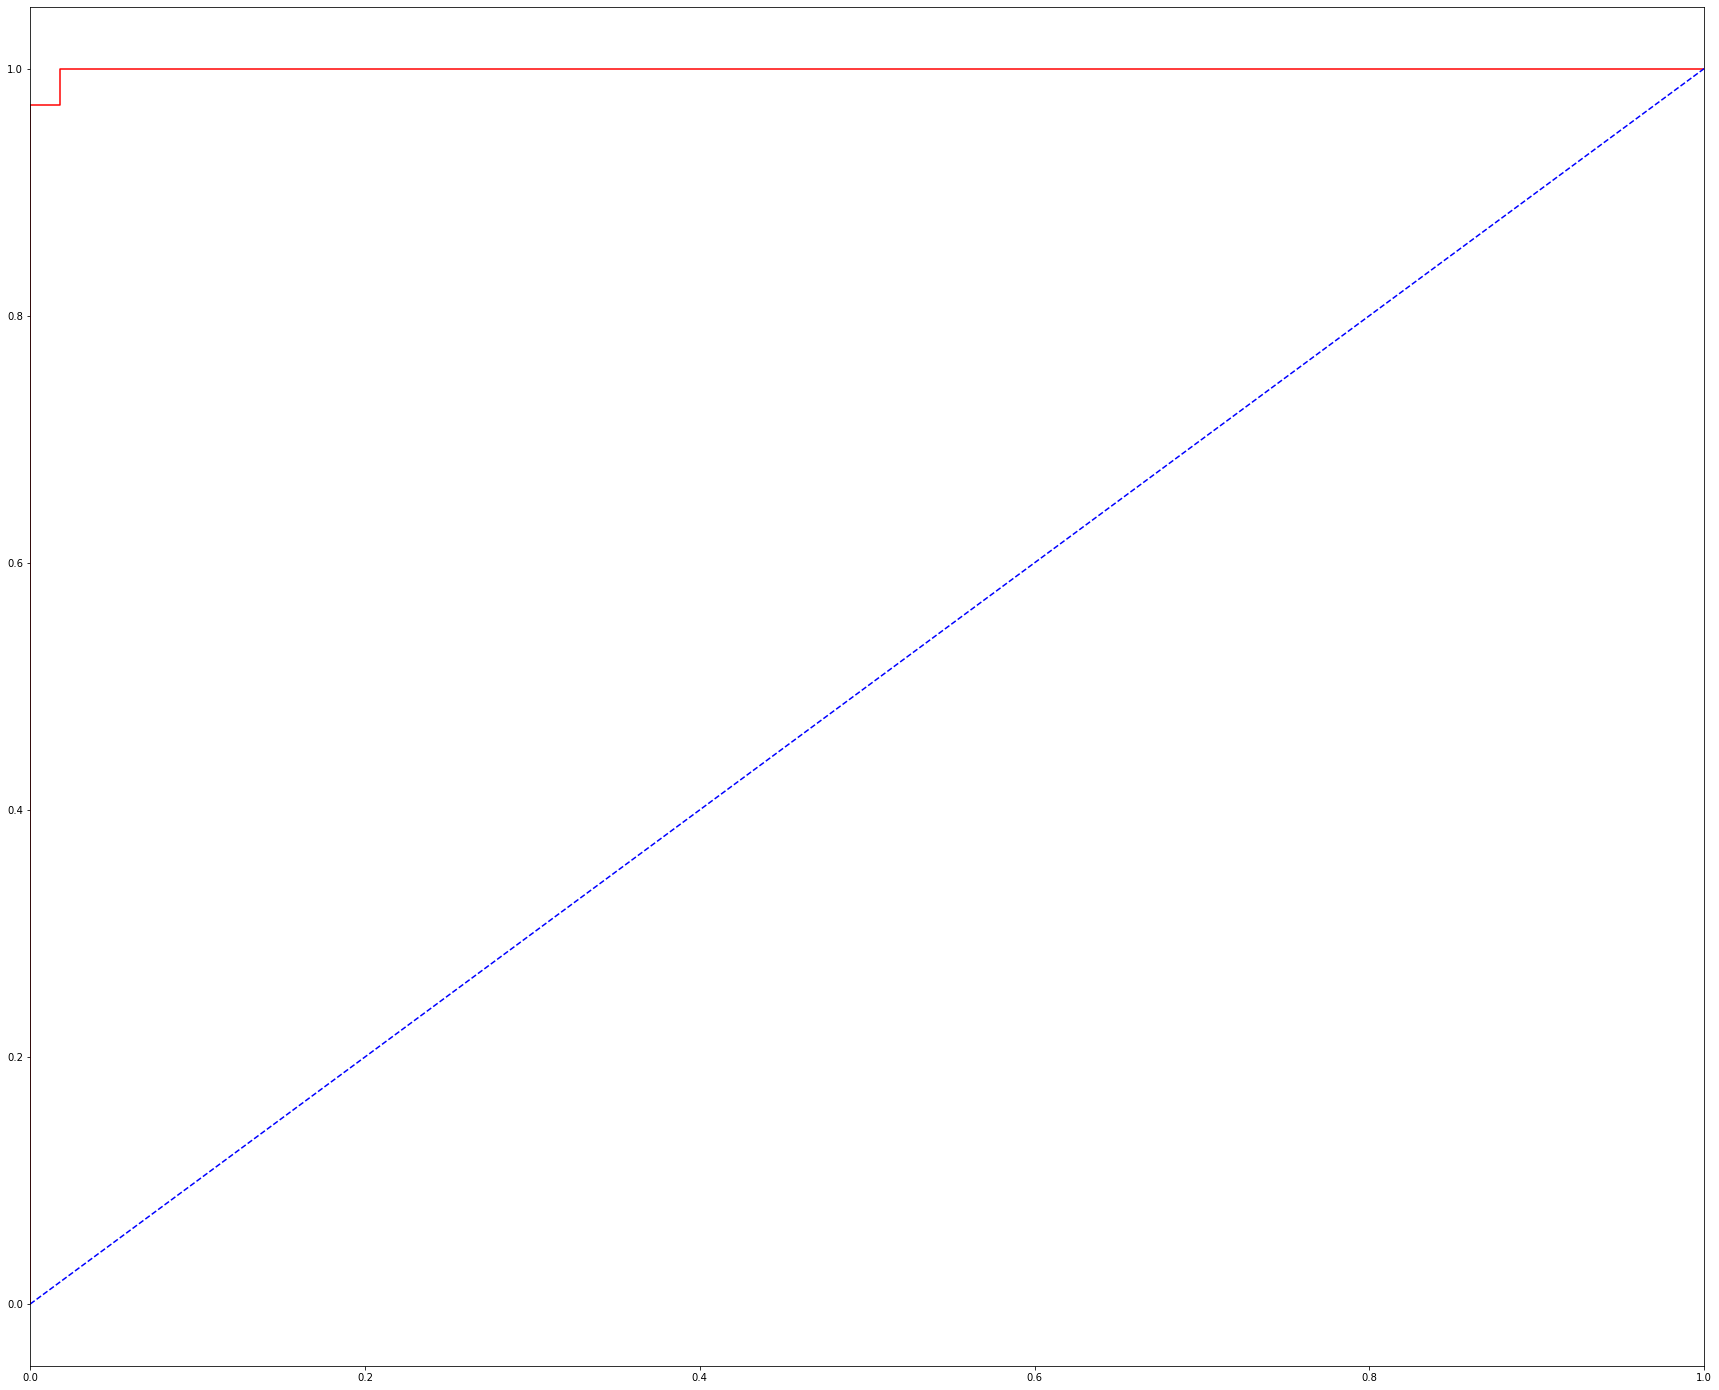

In [3]:
# Compute ROC curve
Y_score = lr.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, Y_score)

plt.figure(figsize=(30, 25))

plt.plot(fpr, tpr, color='red', label='Logistic regression (AUC: %.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])


***Area under the curve: AUC***

In [4]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9994840041279669

tpr: True positive rate\
\
fpr: false positive rate\
\
\\(tpr = \frac{TP}{TP + FN}\\)\
\
\\(fpr = \frac{FP}{FP + TN}\\)\
\
So, tpr is the ratio of # true positive to # of everything diagnosed as positive. Similarly, fpr the ratio of # False positive to everything diagnosed as negative. In other word, tpr is the accuracy of the positive; fpr "1 - the accuracy for of negative". Hence, the existence of a trade-off. ***The ROC curve shows how much of accuracy of Positive is gained, with the drop of accuracy of negative.*** \
\
The ideal segments (0,0)->(0,1)->(1,1) corresponds to the ideal situation where regardless of the accuracy of positive, the accuracy of negative is always 1 (fpr=0). And regardless of the accuracy of negative, accuracy of positive is always one (tpr=1).     